# Analysis

This notebook compiles the results of the experiments. The data was logged in MLFlow. For more infromation, check "http://93.125.49.123:49998".

In [31]:
import os
import mlflow
import dotenv

import matplotlib.pyplot as plt

mlflow_client = mlflow.MlflowClient()
dotenv.load_dotenv()
mlflow.set_experiment(os.environ["MLFLOW_EXPERIMENT"])

<Experiment: artifact_location='mlflow-artifacts:/348908674542056884', creation_time=1749723965030, experiment_id='348908674542056884', last_update_time=1749723965030, lifecycle_stage='active', name='ifortex_test_task', tags={}>

In [26]:
def load_metric_history(run_id: str, metric_name: str):
    history = mlflow_client.get_metric_history(run_id, metric_name)
    return [h.value for h in history]

def load_metrics_history(run_id: str):
    metrics = ["BCE_train", "BCE_test", "AUC_train", "AUC_test"]
    return {
        m: load_metric_history(run_id=run_id, metric_name=m)
        for m in metrics
    }

## Baseline

The first model is an RNN; check the Torch implementation [here](src/model.py). It has one RNN layer and a hidden size of 10.

In [ ]:
run_id = (
    mlflow
    .search_runs(filter_string="attributes.run_name='RNN_baseline'")
    .loc[0, "run_id"]
)
run = mlflow.get_run(run_id=run_id)
history = load_metrics_history(run_id=run_id)

### Learning curves

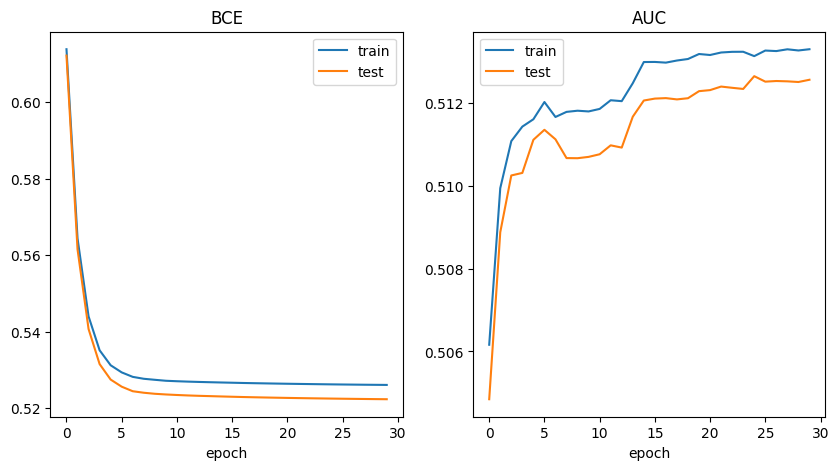

In [50]:
plt.figure(figsize=(10, 5))

def plot_learning_curves(train, test):
    plt.plot(train)
    plt.plot(test)
    plt.xlabel("epoch")
    plt.legend(["train", "test"])


plt.subplot(121)
plt.title("BCE")
plot_learning_curves(history["BCE_train"], history["BCE_test"])

plt.subplot(122)
plt.title("AUC")
plot_learning_curves(history["AUC_train"], history["AUC_test"])

plt.show()

Even though the model has not achieved any acceptable results, the graphs show that the model is learning.

**Note** the fact, that train loss has worse results than the test loss confuses me. There is no visible issues in training or logging process.